<a href="https://colab.research.google.com/github/karthsanth/ai_grade_asseser/blob/main/aigradeassesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
df = pd.read_csv('student-mat.csv')
print(df)

# Getting first 3 rows from the DataFrame
df_first_3 = df.head(3)
print(df_first_3)

    school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0    GP;"F";18;"U";"GT3";"A";4;4;"at_home";"teacher...                                                                                                                                                                                 
1    GP;"F";17;"U";"GT3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
2    GP;"F";15;"U";"LE3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
3    GP;"F";15;"U";"GT3";"T";4;2;"health";"services...                  

Training Decision Tree Model...
Decision Tree RMSE: 2.38


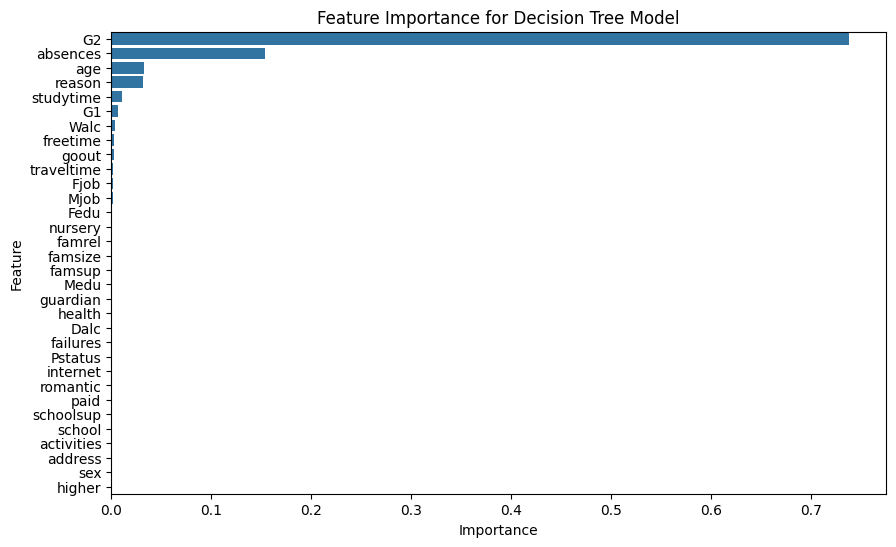

Feature Importances (Decision Tree):
        Feature  Importance
31          G2    0.738437
29    absences    0.154388
2          age    0.033211
10      reason    0.031903
13   studytime    0.010554
30          G1    0.007035
27        Walc    0.003385
24    freetime    0.002654
25       goout    0.002645
12  traveltime    0.001844
9         Fjob    0.001689
8         Mjob    0.001625
7         Fedu    0.001202
19     nursery    0.000945
23      famrel    0.000934
4      famsize    0.000892
16      famsup    0.000879
6         Medu    0.000773
11    guardian    0.000732
28      health    0.000720
26        Dalc    0.000697
14    failures    0.000589
5      Pstatus    0.000411
21    internet    0.000410
22    romantic    0.000302
17        paid    0.000301
15   schoolsup    0.000282
0       school    0.000257
18  activities    0.000151
3      address    0.000151
1          sex    0.000000
20      higher    0.000000
Training ANN Model...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 122.2130 - mean_squared_error: 122.2130 - val_loss: 105.9638 - val_mean_squared_error: 105.9638
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 101.4853 - mean_squared_error: 101.4853 - val_loss: 90.6147 - val_mean_squared_error: 90.6147
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 89.0017 - mean_squared_error: 89.0017 - val_loss: 75.6589 - val_mean_squared_error: 75.6589
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 69.8853 - mean_squared_error: 69.8853 - val_loss: 61.2304 - val_mean_squared_error: 61.2304
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 57.0776 - mean_squared_error: 57.0776 - val_loss: 47.5342 - val_mean_squared_error: 47.5342
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 42.9039 - mean_squared_error: 42.9039 - val_loss: 35.5538 - val_mean_squared_error: 35.5538
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 30.4953 - mean_squared_error: 30.4953 - val_loss: 26.1192 - 

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
ANN RMSE: 2.85


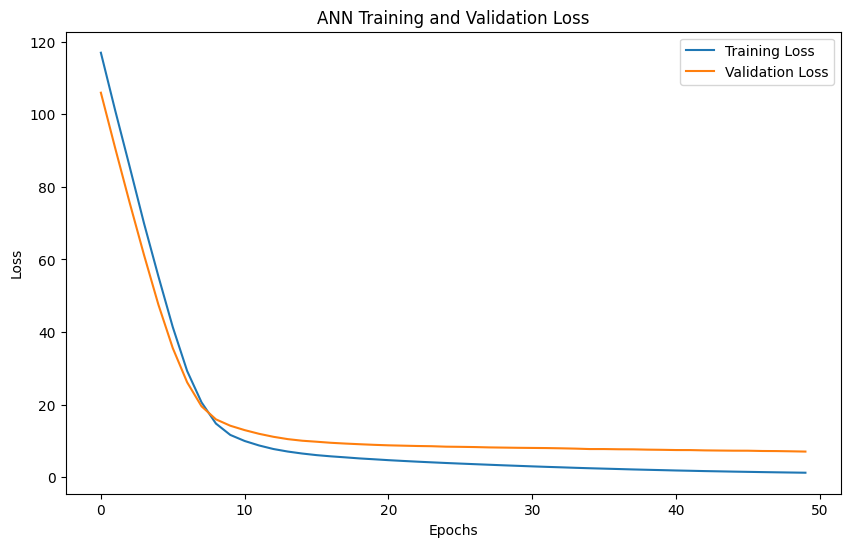

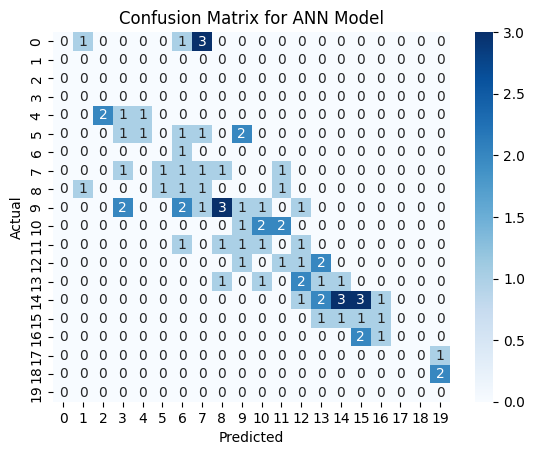

Decision Tree performs better than ANN


/usr/local/lib/python3.10/dist-packages/gradio/utils.py:1003: UserWarning: Expected 1 arguments for function <function predict_grade at 0x7b6c9f214790>, received 32.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/utils.py:1011: UserWarning: Expected maximum 1 arguments for function <function predict_grade at 0x7b6c9f214790>, received 32.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4a4c782ab5cc94a4af.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
import gradio as gr  # Importing Gradio

# Step 1: Load the dataset
df = pd.read_csv('student-mat.csv', sep=';')  # Adjust path as needed

# Step 2: Data preprocessing
# Convert categorical variables to numeric using Label Encoding
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Step 3: Feature and target selection
X = df.drop(columns=['G3'])  # Features
y = df['G3']  # Target (final grade)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Choose model type (Uncomment the approach you prefer)

# --- Decision Tree Model ---
print("Training Decision Tree Model...")
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'Decision Tree RMSE: {rmse_dt:.2f}')

# Feature importance from Decision Tree
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': dt_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance for Decision Tree Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print("Feature Importances (Decision Tree):\n", feature_importances)

# --- ANN Model ---
print("Training ANN Model...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ann_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Linear activation for regression
])

ann_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

history = ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate ANN Model
y_pred_ann = ann_model.predict(X_test_scaled)
y_pred_ann = y_pred_ann.flatten()  # Flatten the predictions array
rmse_ann = np.sqrt(mean_squared_error(y_test, y_pred_ann))
print(f'ANN RMSE: {rmse_ann:.2f}')

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('ANN Training and Validation Loss')
plt.show()

# Plot confusion matrix for ANN (if classification approach used)
y_pred_classes = np.round(y_pred_ann)  # Rounding for classification (if applicable)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for ANN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 6: Model evaluation
if rmse_dt < rmse_ann:
    print("Decision Tree performs better than ANN")
else:
    print("ANN performs better than Decision Tree")

# Step 7: Save models for later use
import joblib

# Save Decision Tree model
joblib.dump(dt_model, 'decision_tree_model.pkl')

# Save ANN model
ann_model.save('ann_model.h5')

# Step 8: Gradio interface for user input
def predict_grade(input_data):
    # Convert user input to DataFrame
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Scale the input for ANN
    input_scaled = scaler.transform(input_df)

    # Predict using both models
    dt_prediction = dt_model.predict(input_df)[0]
    ann_prediction = ann_model.predict(input_scaled)[0][0]

    return {"Decision Tree Prediction": dt_prediction, "ANN Prediction": ann_prediction}

# Define Gradio input interface
gradio_inputs = [
    gr.Textbox(label=col) for col in X.columns
]

gr_interface = gr.Interface(fn=predict_grade,
                            inputs=gradio_inputs,
                            outputs=[gr.Label(label="Decision Tree Prediction"), gr.Label(label="ANN Prediction")],
                            title="Student Grade Prediction",
                            description="Enter student details to predict final grade using Decision Tree and ANN models.")

# Launch the Gradio app
gr_interface.launch()

